In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, SGDRegressor, RidgeCV, LassoCV
from scipy.stats import skew

In [4]:
train = pd.DataFrame(np.loadtxt('X-DTLZ2.txt'))
Y = pd.DataFrame(np.loadtxt('Y-DTLZ2.txt'))
Y.columns = ['Var_' + str(i) for i in range(Y.shape[1])]
train.columns = ['Obj_' + str(i) for i in range(train.shape[1])]
train.shape

(10000, 3)

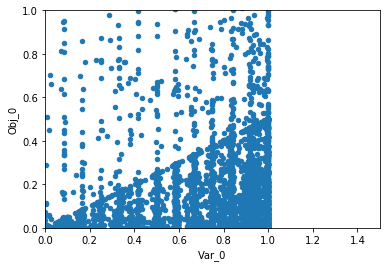

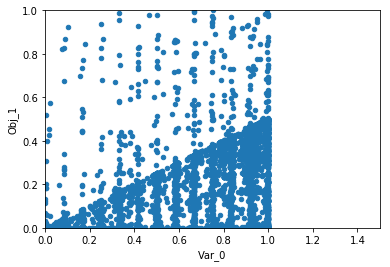

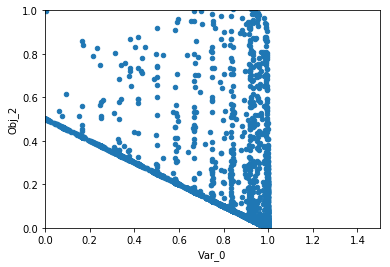

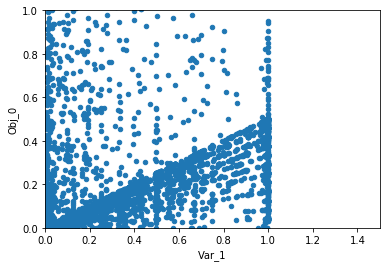

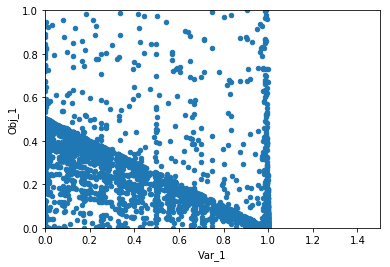

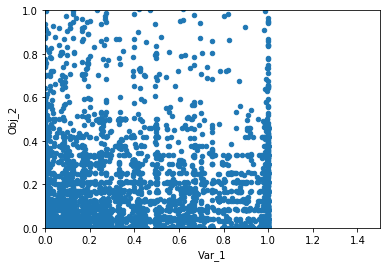

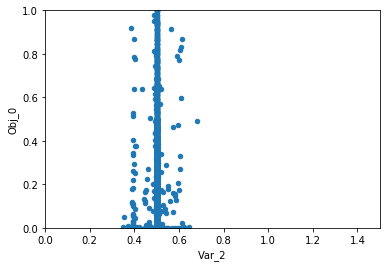

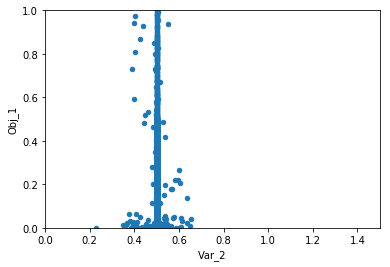

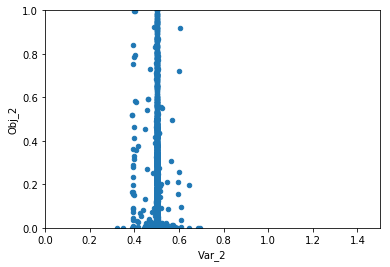

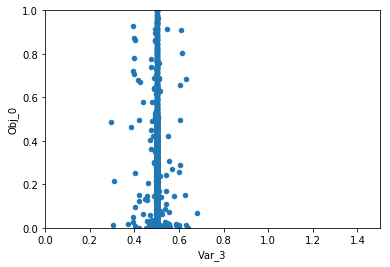

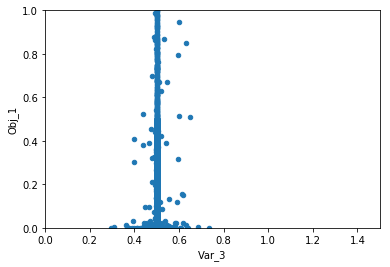

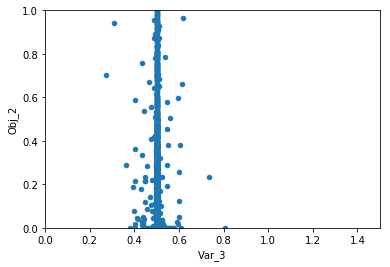

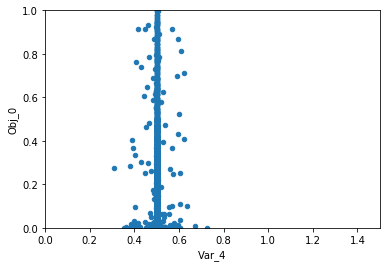

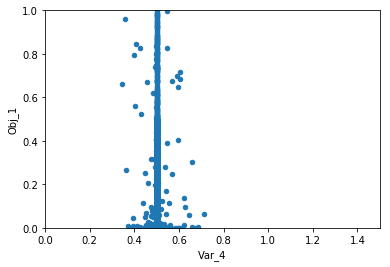

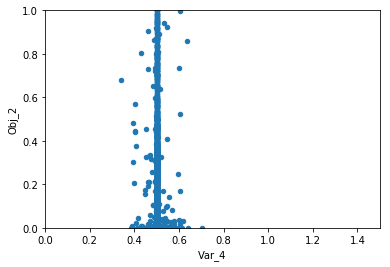

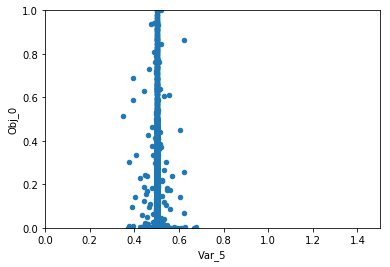

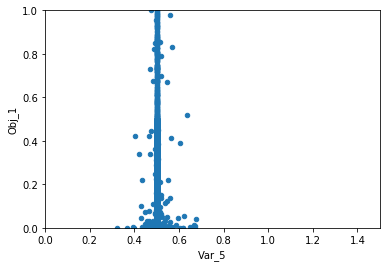

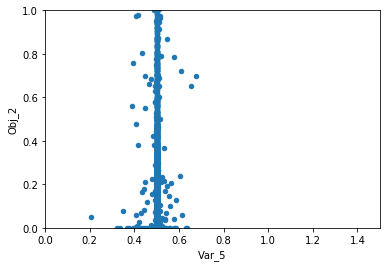

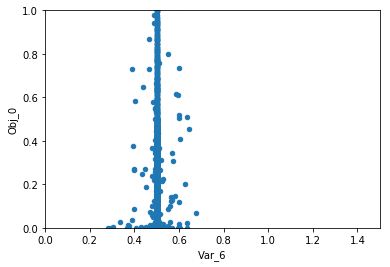

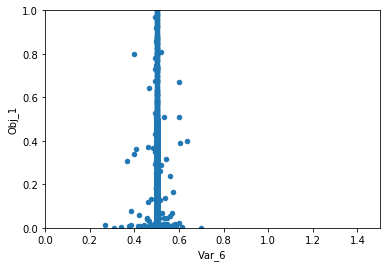

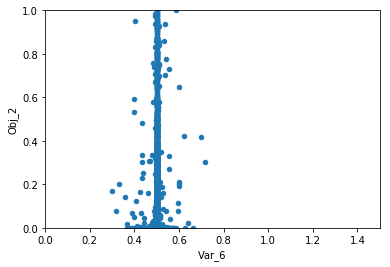

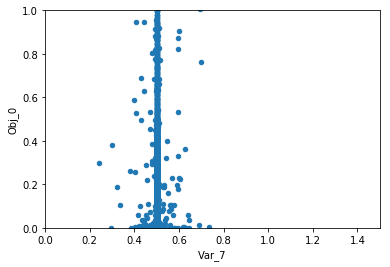

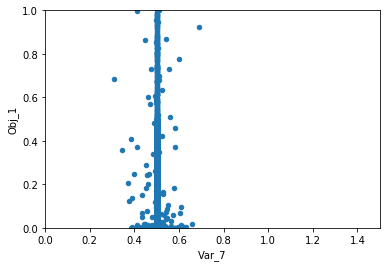

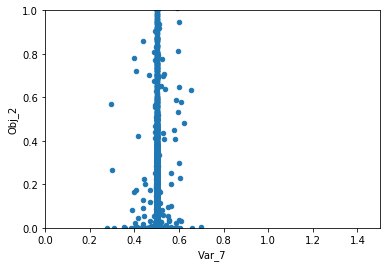

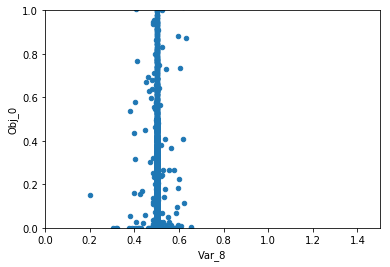

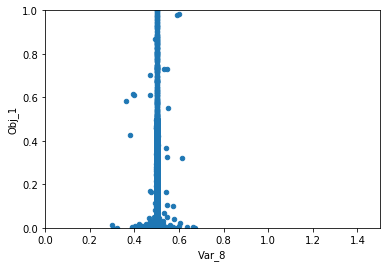

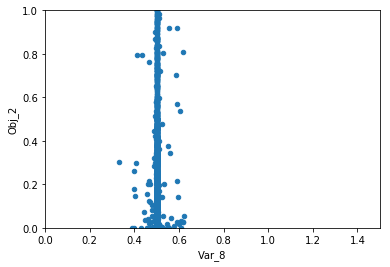

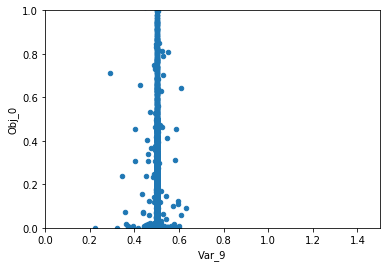

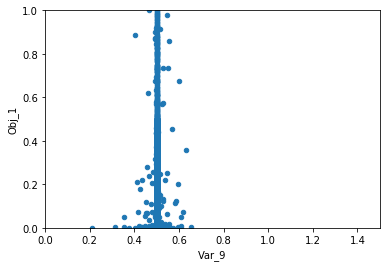

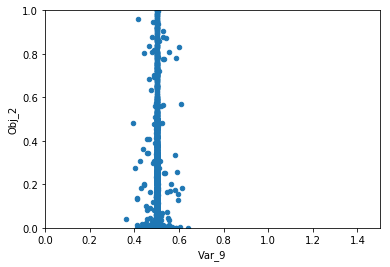

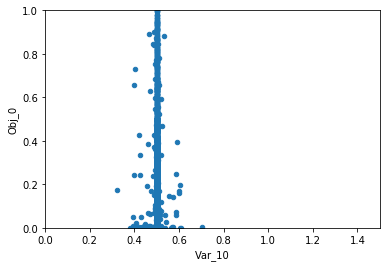

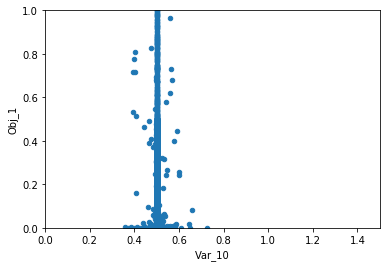

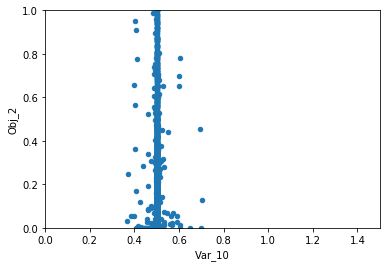

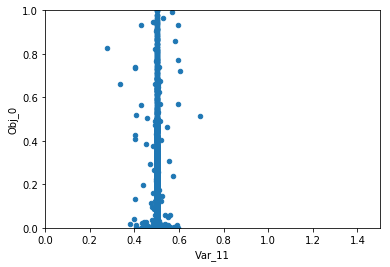

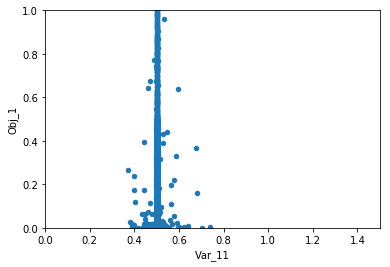

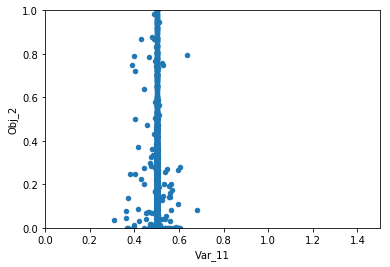

In [6]:
for j in range(Y.shape[1]):
    for i in range(X.shape[1]):
        obj = 'Obj_' + str(i)
        var = 'Var_'+ str(j)
        data = pd.concat([Y[var],X[obj]], axis=1)
        data.plot.scatter(x=var, y=obj, ylim=(0,1), xlim=(0, 1.5));
        plt.show()

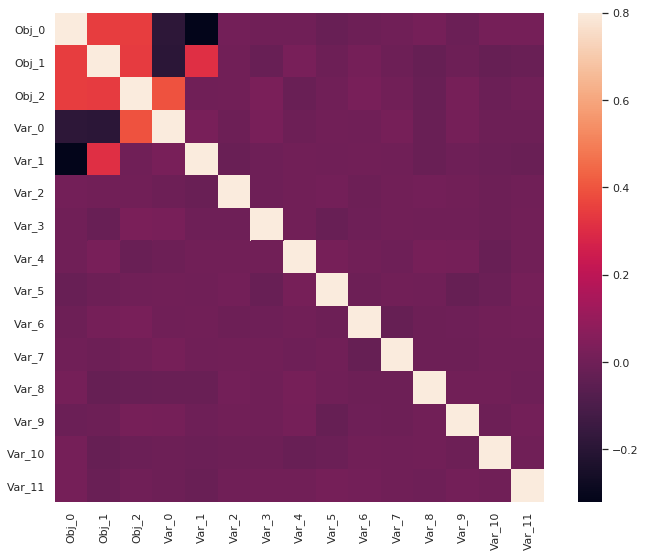

In [15]:
data = pd.concat([X,Y], axis=1)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

/home/matheus/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


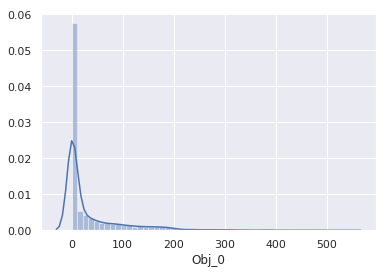

In [19]:
sns.distplot(X.Obj_0);

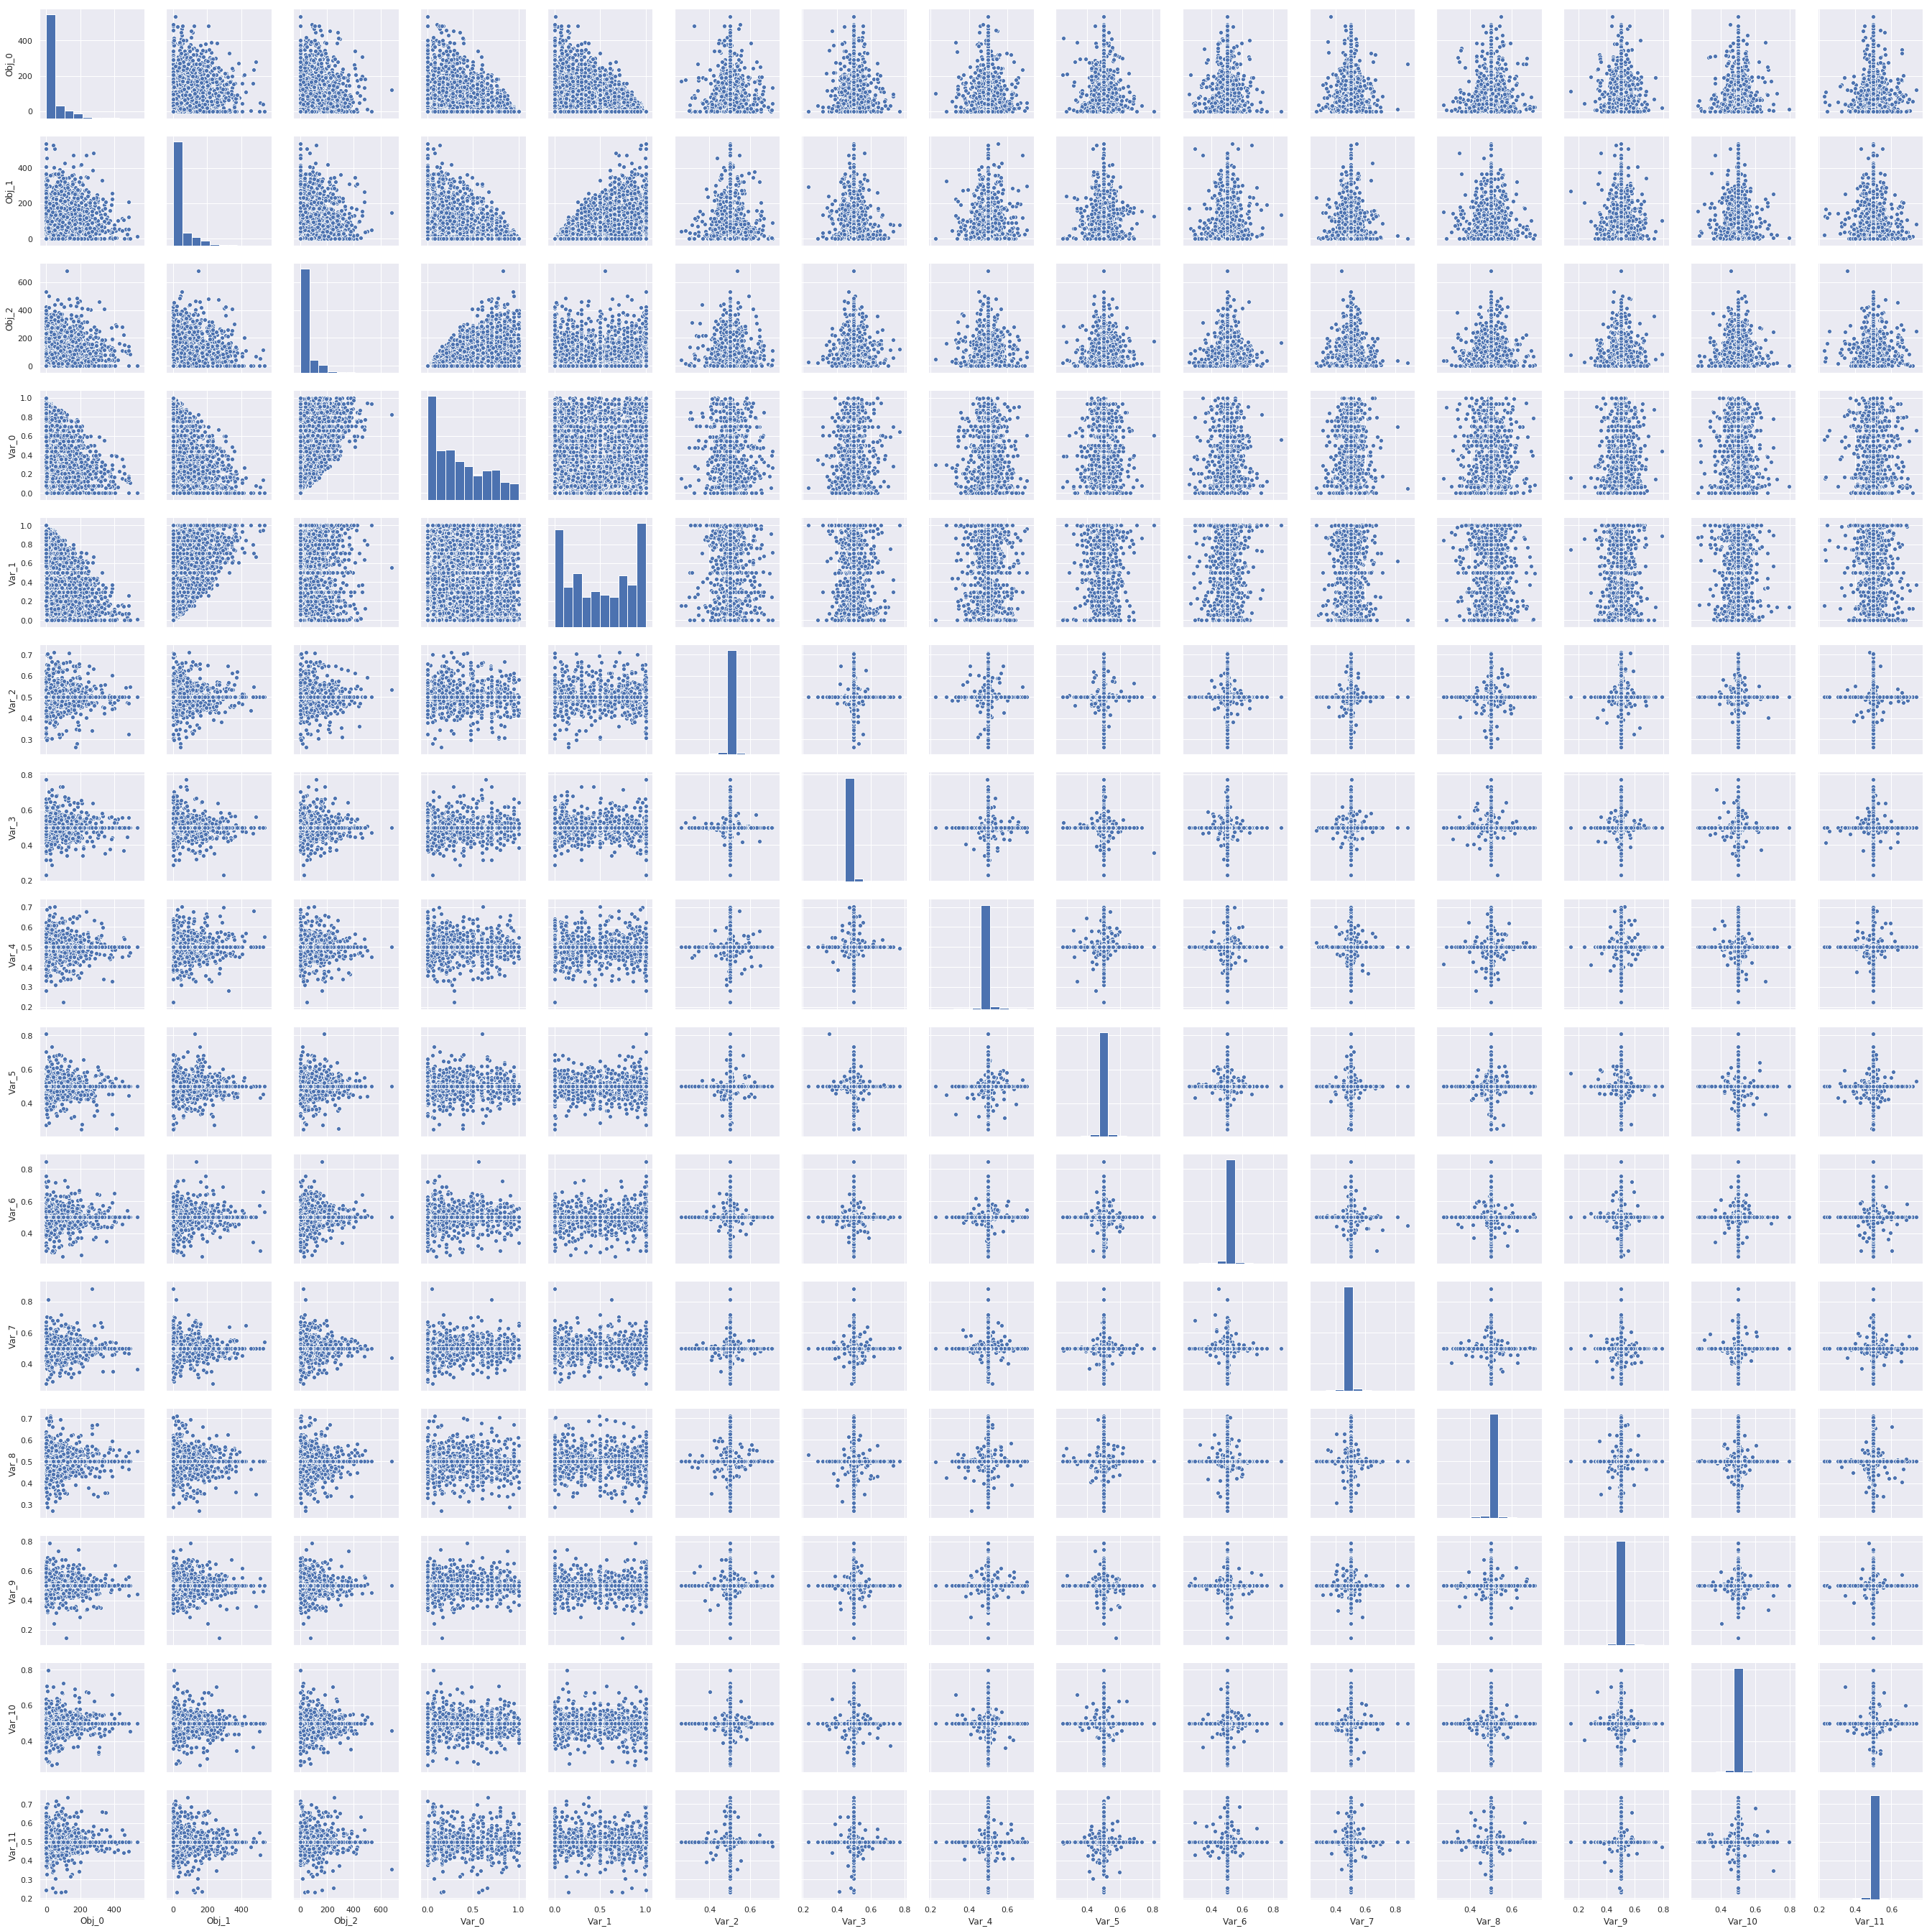

In [17]:
sns.set()
data = pd.concat([X,Y], axis=1)
sns.pairplot(data, height = 2.5)
plt.show();

/home/matheus/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


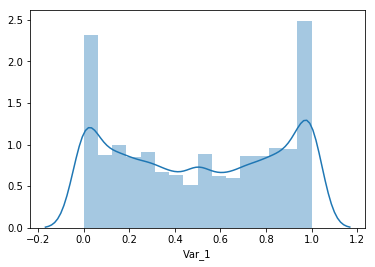

In [43]:
skewed_feats = train.apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
train[skewed_feats] = np.log1p(train[skewed_feats])
sns.distplot(Y["Var_1"])

/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of 

0.12821761713375857


/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of 

/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of 

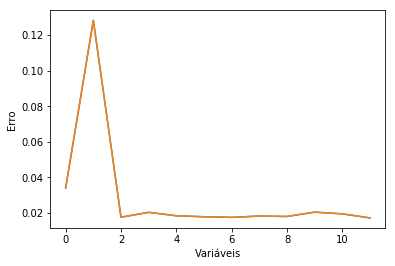

In [54]:
from sklearn.model_selection import cross_val_score
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
def rmse_cv(model, X, y):
    rmse= np.sqrt(-cross_val_score(model,X, y, scoring="neg_mean_squared_error", cv = 5))
    return rmse
ridge_cv = []
cols = []
lasso_cv = []
print(rmse_cv(model_lasso, X, Y.loc[:,'Var_1']).mean())
for i in Y.columns:
    ridge_cv.append(rmse_cv(ridge, X, Y.loc[:,i]).mean())
    lasso_cv.append(rmse_cv(model_lasso, X, Y.loc[:,i]).mean())

ridge_cv = pd.Series(ridge_cv, index=np.arange(12))
lasso_cv = pd.Series(lasso_cv, index=np.arange(12))
ridge_cv.plot()
plt.xlabel("Variáveis")
plt.ylabel('Erro')
lasso_cv.plot()

Best alpha : 0.6


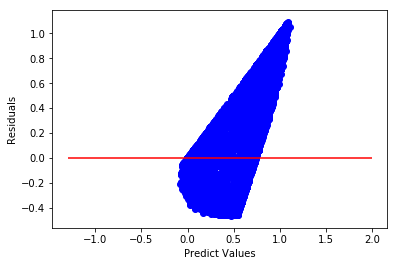

In [38]:
X = train
var = 'Var_1'

ridge.fit(X,Y.loc[:, var])
alpha = ridge.alpha_
print("Best alpha :", alpha)
y_train_pred = ridge.predict(X)

y_rsd = y_train_pred - Y.Var_0
plt.scatter(y_train_pred, y_rsd, c = "blue", label = "Training data")
plt.xlabel("Predict Values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = -1.3, xmax = 2.0, color = "red")# plotar a reta

In [44]:
alg = [0.4186342412317153, 0.41862048205402363, 0.4186230220949473, 0.4186249834551884, 0.4186263586594597, 0.41862735465131373, 0.4186280778690009, 0.4186286076678344, 0.418629026425933, 0.41862935416002045, 0.41862960698438756, 0.41862980848858905, 0.41862997098349264, 0.4186301032196338, 0.41863021551901725, 0.418630305715655, 0.41863038192459606, 0.4186304521620593, 0.4186305063202682, 0.4186305579580567, 0.4186306010542677, 0.41863063738672274, 0.41863067638707563, 0.418630705134885, 0.4186307280840098, 0.418630753329431, 0.41863077261217796, 0.4186307914006962, 0.41863080918126194, 0.4186308224195472, 0.41863083816311775, 0.41863084824316665, 0.4186308651384164, 0.41863087112623504, 0.41863088895704326, 0.4186308900442835, 0.4186308982141595, 0.4186309050422344, 0.4186309132953161, 0.4186309225809804, 0.4186309271935696, 0.41863094123395683, 0.41863093584449174, 0.41863094055411454, 0.4186309498657263, 0.4186309543270939, 0.4186309515374506, 0.4186309558718016, 0.4186309623112961, 0.4186309620195893]
rdm = [0.9183869698874467, 0.7969372919077738, 0.8445961063347656, 0.5660374109828511, 0.9564082119544399, 0.8650840375849135, 0.9643996134138736, 0.9596228084420624, 0.9348727949399601, 0.889052950168952, 0.8914767149952121, 0.6845085380672375, 0.8665470627832296, 0.7485632246995059, 0.7540609925555992, 0.6500659559569469, 0.9821316046132748, 0.7944891632090064, 0.8738702893455235, 1.0026212297372668, 0.7378824022985763, 0.8031884163509713, 0.7873254374265135, 0.8735007338398715, 0.7368884976122922, 0.9445334878271641, 0.8647431356804165, 0.7694835368475818, 0.922421514675967, 0.7052825045137153, 0.8628189350639547, 0.7835667292577667, 0.6764015099891753, 0.9806965900991552, 0.8073213722801391, 0.8292470243111123, 0.6842333798137544, 0.8142815407937168, 0.8869816397898075, 1.0187594665024065, 0.7385543076561569, 0.8360659267661104, 0.7503181357928564, 0.9382845423155308, 0.8030857968700185, 0.7289466431038502, 0.8941500595621732, 0.5824983151218648, 0.8448211124930813, 0.9093538865704631]


Text(0.5, 0, 'Iteração')

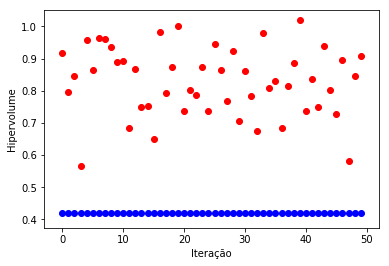

In [45]:
alg = np.array(alg)
rdm = np.array(rdm)
plt.scatter(np.arange(len(alg)), alg,c="blue", label = "Estimativas")
plt.scatter(np.arange(len(rdm)), rdm,c="red", label = "Estimativas")
plt.ylabel("Hipervolume")
plt.xlabel("Iteração")